In [1]:
import numpy as np
import random
import copy as cp
from decimal import *

import matplotlib.pyplot as plt

# Functions

## Decryption

### Creating/Testing Transition matricies

In [2]:
A = ["a", "b", "c", "d", "e", "f", "g", "h", "i", "j", "k", "l", "m", "n", "o", "p", "q", "r", "s", "t", "u", "v", "w", "x", "y", "z", " "]

In [3]:
def makeTransition(text):

    inTxt = text
    file = open(inTxt, mode='r', encoding='utf-8-sig')

    reader = np.array(([char.lower() for char in file.read()]))
    file.close()
    
    prevL = reader[0]
    
    F = np.zeros((27, 27))

    for letter in reader[1:]:
       
        if letter in A:
       
            F[A.index(prevL)][A.index(letter)] += 1
            prevL = letter
    
    for i, vector in enumerate(F):
        
        for j, element in enumerate(vector):
            if element == 0:
                vector[j] = .01
        
        total = np.sum(vector)
        #print(vector)
        
        if total != 0:
            F[i] = vector/total  
            
    return F

In [4]:
def check(transitionMatrix):
    
    F = transitionMatrix 
    
    for i, vector in enumerate(F):
        
        total = np.sum(vector)
        
        print(total)

### Creating an intial structure and a random guess for the decryption mapping and a method to implement it

In [5]:
def genInitialMap():
    
    Map = []
    
    A = ["a", "b", "c", "d", "e", "f", "g", "h", "i", "j", "k", "l", "m", "n", "o", "p", "q", "r", "s", "t", "u", "v", "w", "x", "y", "z", " "]
    
    for i, element in enumerate(A):
        
        Map.append([element, 0])
    
    Map[26][1] = " "
    
    for i, element in enumerate(((A[::-1])[1::])):
        
        Map[i][1] = element
    
    Map = np.array(Map)
    
    return Map

In [6]:
def randomMap():
    
    InitialMap = genInitialMap()

    for i in range(0,100):

        InitialMap = cipherChange(InitialMap)
    
    return InitialMap

In [7]:
def decipher(Map, text):
    
    decoded = []
    
    for char in text:
        
        for elem in Map:
            
            if char == elem[1]:
                
                decoded.append(elem[0])
                
    return decoded

### Developing a way to "update" the decryption function

In [8]:
def cipherChange(Map):
    
    for i in range(2):
    
        a = random.randint(0, 25)
        b = random.randint(0, 25)
    
        while b == a:
            b = random.randint(0,25)
        
        a_val = Map[a][1]
        b_val = Map[b][1]
    
        Map[a][1] = b_val
        Map[b][1] = a_val
    
    return Map

In [9]:
def cipherChangeFine(Map):
    
    a = random.randint(0, 25)
    b = random.randint(0, 25)
    
    while b == a:
        b = random.randint(0,25)
    
    a_val = Map[a][1]
    b_val = Map[b][1]
    
    Map[a][1] = b_val
    Map[b][1] = a_val
    
    return Map

### Scoring the decryption function

In [10]:
def score(decoded, trans):
    
    prevL = decoded[0]
    score = 1
    
    for element in decoded[1::]:
        
        score = 100*score*trans[A.index(prevL)][A.index(element)] 
        
        #The ten is an adjustable factor to keep the score from getting too small for python
        
        prevL = element
        
    return score

## Generating The Cipher (Yes we use randomMap here too)

In [11]:
def randomMap():
    
    InitialMap = genInitialMap()

    for i in range(0,100):

        InitialMap = cipherChange(InitialMap)
    
    return InitialMap

In [12]:
def cipher(Map, Message):
    
    text = Message 
    
    coded = []
    
    for char in text:
       
        for elem in Map:
            
            if char == elem[0]:
               
                coded.append(elem[1])
    
    return coded

In [13]:
def message(text):   
    
    inTxt = text
    file = open(inTxt, mode='r', encoding='utf-8-sig')

    reader = [char.lower() for char in file.read()]
    reader = np.array([char for char in reader if char in A])
    file.close()
    
    return reader

# Implementing

## Create Cipher

In [14]:
#Generate Random Cipher Key

key = randomMap()

In [15]:
#encode Message

M1Prime = message('twentyleagues.txt')

Q = 3100
R = 3400

M1 = M1Prime[Q:R:]
encryptedText = cipher(key,M1)[0:R-Q:]

print(M1)
print("")
print(encryptedText)
print("")
print(key)

['d' ' ' 'l' 'i' 't' 't' 'l' 'e' ' ' 'h' 'a' 's' ' ' 'c' 'h' 'a' 'n' 'g'
 'e' 'd' ' ' 's' 'i' 'n' 'c' 'e' ' ' ' ' 'y' 'e' 'a' 'r' 's' ' ' 'l' 'a'
 't' 'e' 'r' ' ' 'a' ' ' 't' 'i' 'm' 'e' 'c' 'o' 'v' 'e' 'r' ' ' 's' 't'
 'o' 'r' 'y' ' ' 'o' 'n' ' ' 'd' 'e' 'e' 'p' 's' 'e' 'a' ' ' 'e' 'x' 'p'
 'l' 'o' 'r' 'a' 't' 'i' 'o' 'n' ' ' 'm' 'a' 'd' 'e' ' ' 'm' 'u' 'c' 'h'
 ' ' 't' 'h' 'e' ' ' 's' 'a' 'm' 'e' ' ' 'a' 'd' 'm' 'i' 's' 's' 'i' 'o'
 'n' ' ' 'w' 'e' 'k' 'n' 'o' 'w' ' ' 'm' 'o' 'r' 'e' ' ' 'a' 'b' 'o' 'u'
 't' ' ' 'm' 'a' 'r' 's' ' ' 't' 'h' 'a' 'n' ' ' 'w' 'e' ' ' 'k' 'n' 'o'
 'w' ' ' 'a' 'b' 'o' 'u' 't' ' ' 't' 'h' 'e' ' ' 'o' 'c' 'e' 'a' 'n' 's'
 ' ' 't' 'h' 'i' 's' ' ' 'r' 'e' 'a' 'l' 'i' 't' 'y' 'b' 'e' 'g' 'i' 'n'
 's' ' ' 't' 'o' ' ' 'e' 'x' 'p' 'l' 'a' 'i' 'n' ' ' 't' 'h' 'e' ' ' 'd'
 'a' 'r' 'k' ' ' 'p' 'o' 'w' 'e' 'r' ' ' 'a' 'n' 'd' ' ' 'o' 't' 'h' 'e'
 'r' 'w' 'o' 'r' 'l' 'd' 'l' 'y' ' ' 'f' 'a' 's' 'c' 'i' 'n' 'a' 't' 'i'
 'o' 'n' ' ' 'o' 'f' 't' 'w' 'e' 'n' 't' 'y' ' ' 't

## Generate decrypting Tools

In [16]:
#Generate Transition Matrix

Trans = makeTransition('twentyleagues.txt')


In [17]:
print(Trans)

[[5.12416961e-04 2.33149717e-02 3.99319217e-02 4.68861519e-02
  9.69932105e-04 7.94246290e-03 1.73489743e-02 2.41567996e-03
  4.94482367e-02 4.20913932e-04 1.19868968e-02 7.56364036e-02
  2.29123584e-02 1.94498838e-01 5.85619384e-04 3.31057958e-02
  5.67318778e-04 9.75422286e-02 9.09174094e-02 1.34216643e-01
  2.24182420e-02 2.35528796e-02 7.81435866e-03 2.54378420e-03
  2.47241184e-02 2.12287027e-03 6.56625734e-02]
 [7.99633878e-02 8.14721310e-03 7.04080144e-04 1.40816029e-03
  2.64935300e-01 1.00582878e-04 7.04080144e-04 1.00582878e-06
  4.50611292e-02 7.24196720e-03 1.00582878e-06 1.25225683e-01
  6.53788706e-03 3.01748633e-04 1.17078470e-01 2.01165756e-04
  1.00582878e-06 7.34255008e-02 2.64532969e-02 9.25362476e-03
  1.19593042e-01 4.52622950e-03 1.00582878e-04 1.00582878e-06
  1.01387541e-01 1.00582878e-06 7.64429871e-03]
 [1.68453022e-01 1.04079717e-04 1.62884757e-02 3.12239150e-04
  1.56119575e-01 1.56119575e-04 1.04079717e-04 1.19067196e-01
  5.07909018e-02 5.20398584e-07 5.69

In [18]:
#Check Transition Matrix (all sums should be 1)

check(Trans)

1.0
1.0
1.0
1.0
1.0
1.0
1.0
0.9999999999999999
0.9999999999999998
1.0000000000000002
1.0
1.0
1.0
1.0
1.0
0.9999999999999999
1.0000000000000002
1.0
1.0
1.0
0.9999999999999999
1.0
1.0
1.0
1.0
1.0000000000000002
1.0


In [19]:
#Implement Metroplolis (we use czech boi's version)

Guess = randomMap()

i = 1
I = []

t1 = 0
t2 = 0

while (i < 500):
    
    if i < 250:
    
        newGuess = cipherChange(cp.deepcopy(Guess))
     
    else:
        
        newGuess = cipherChangeFine(cp.deepcopy(Guess))
    
    G = decipher(Guess,encryptedText)
    GPrime = decipher(newGuess,encryptedText)
    
    GS = score(G,Trans)
    GSPrime = score(GPrime,Trans)
    
    if GSPrime > GS:
        
        Guess = newGuess
        
        i = 1
        t2 += 1
    
    else:
        
        Q = GSPrime/GS
        
        #print(Q)
        
        B = np.random.random()
        
        if Q > B: 
            
            Guess = newGuess
            
            i = 1
            t2 += 1
        
        else:
            
            Guess = Guess
            
            t1 += 1
            i += 1
            I.append(i)
            
            #print(i)


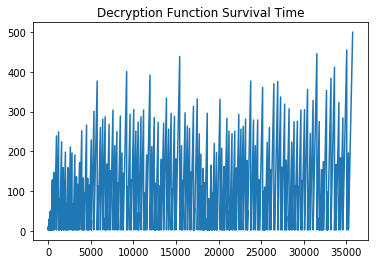


number of iterations equals 35998

number of resests equals 235


In [20]:
#This  should show how our proposed decryption functions survive for longer and longer until we see a "best" function emerge

plt.figure()
plt.title("Decryption Function Survival Time")
plt.plot(I)
plt.show()

print("")        
print("number of iterations equals",t1+t2) 
print("")
print("number of resests equals",t2) 



In [21]:
print(Guess)

[['a' 'g']
 ['b' 's']
 ['c' 't']
 ['d' 'f']
 ['e' 'o']
 ['f' 'a']
 ['g' 'p']
 ['h' 'b']
 ['i' 'd']
 ['j' 'y']
 ['k' 'u']
 ['l' 'x']
 ['m' 'e']
 ['n' 'i']
 ['o' 'n']
 ['p' 'r']
 ['q' 'j']
 ['r' 'v']
 ['s' 'c']
 ['t' 'k']
 ['u' 'h']
 ['v' 'l']
 ['w' 'z']
 ['x' 'q']
 ['y' 'w']
 ['z' 'm']
 [' ' ' ']]


In [22]:
print(G)


['d', ' ', 'l', 'i', 't', 't', 'l', 'e', ' ', 'h', 'a', 's', ' ', 'g', 'h', 'a', 'n', 'b', 'e', 'd', ' ', 's', 'i', 'n', 'g', 'e', ' ', ' ', 'y', 'e', 'a', 'r', 's', ' ', 'l', 'a', 't', 'e', 'r', ' ', 'a', ' ', 't', 'i', 'm', 'e', 'g', 'o', 'v', 'e', 'r', ' ', 's', 't', 'o', 'r', 'y', ' ', 'o', 'n', ' ', 'd', 'e', 'e', 'p', 's', 'e', 'a', ' ', 'e', 'x', 'p', 'l', 'o', 'r', 'a', 't', 'i', 'o', 'n', ' ', 'm', 'a', 'd', 'e', ' ', 'm', 'u', 'g', 'h', ' ', 't', 'h', 'e', ' ', 's', 'a', 'm', 'e', ' ', 'a', 'd', 'm', 'i', 's', 's', 'i', 'o', 'n', ' ', 'w', 'e', 'k', 'n', 'o', 'w', ' ', 'm', 'o', 'r', 'e', ' ', 'a', 'c', 'o', 'u', 't', ' ', 'm', 'a', 'r', 's', ' ', 't', 'h', 'a', 'n', ' ', 'w', 'e', ' ', 'k', 'n', 'o', 'w', ' ', 'a', 'c', 'o', 'u', 't', ' ', 't', 'h', 'e', ' ', 'o', 'g', 'e', 'a', 'n', 's', ' ', 't', 'h', 'i', 's', ' ', 'r', 'e', 'a', 'l', 'i', 't', 'y', 'c', 'e', 'b', 'i', 'n', 's', ' ', 't', 'o', ' ', 'e', 'x', 'p', 'l', 'a', 'i', 'n', ' ', 't', 'h', 'e', ' ', 'd', 'a', 'r',

In [23]:
def compare(map1, map2):
    matches = 0
    for i, key in enumerate(map1):
        if key[1] == map2[i][1]:
            matches += 1
    return matches

In [24]:
compare(key,Guess)

22